# **05. Cat Dog Image Classifier using CNN and Transfer Learning**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---



In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score,ConfusionMatrixDisplay
from sklearn import datasets
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, optimizers, metrics, losses
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adadelta,Adagrad,Adamax,Nadam
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory, plot_model, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, Xception, DenseNet121, DenseNet169, DenseNet201, MobileNetV2, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7, NASNetLarge, NASNetMobile
from tensorflow.keras.applications.vgg16 import preprocess_input


In [2]:
test_image = image.load_img('/content/uploaded image.png', target_size = (224, 224))

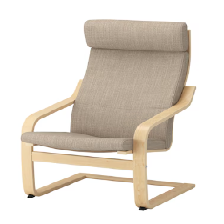

In [3]:
test_image

In [4]:
test_data = image.img_to_array(test_image).reshape(1,224,224,3)

## Imagenet

In [5]:
model =  ResNet50(weights = 'imagenet')

In [6]:
model_pred = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [7]:
model_pred

array([[1.90255633e-07, 1.62711615e-07, 1.79615625e-07, 1.02648436e-07,
        6.86242572e-07, 1.30579465e-07, 2.41611420e-09, 1.06093964e-07,
        1.70077584e-07, 4.41158825e-08, 2.28507258e-08, 2.52776768e-08,
        6.22847196e-08, 2.97158351e-08, 3.26899624e-07, 3.79610043e-07,
        1.70421131e-07, 6.61503805e-07, 1.76263896e-07, 8.42312545e-07,
        5.04391302e-08, 4.30489990e-08, 2.32999060e-08, 3.58635646e-08,
        7.39985282e-08, 4.62747778e-08, 1.77683521e-08, 5.39612358e-07,
        1.33349985e-07, 2.43589202e-08, 9.92669840e-08, 6.93827147e-08,
        5.94695777e-08, 1.53464903e-08, 4.64266378e-07, 3.48759102e-08,
        9.96925298e-09, 1.02257999e-07, 1.49938856e-07, 1.70040281e-07,
        1.53542274e-07, 1.30503153e-07, 1.98426932e-07, 5.01353441e-07,
        1.08042542e-07, 2.35278520e-07, 1.45044589e-06, 1.04277990e-06,
        1.88108316e-07, 3.46542239e-09, 7.60603882e-07, 9.07534229e-07,
        2.80206564e-07, 2.43879896e-07, 3.10095736e-08, 1.963343

In [8]:
len(model_pred[0])

1000

In [9]:
pred_class = np.argmax(model_pred)
pred_class

765

In [10]:
from tensorflow.keras.applications.resnet50 import decode_predictions

In [11]:
decode_predictions(model_pred,top=2)

[[('n04099969', 'rocking_chair', 0.9226809),
  ('n03376595', 'folding_chair', 0.019101862)]]

## VGG

In [12]:
from tensorflow.keras.applications.vgg19  import preprocess_input, decode_predictions

In [13]:
test_data_2 = preprocess_input(image.img_to_array(test_image).reshape(1,224,224,3))

In [14]:
model2 = VGG19(weights = 'imagenet')

In [15]:
model2.predict(test_data_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[5.65761937e-10, 1.80125359e-11, 3.37586278e-11, 4.31146611e-11,
        2.58856270e-10, 1.22281759e-11, 1.94907431e-13, 7.60115582e-11,
        9.30838948e-11, 3.16121435e-11, 7.89254773e-11, 3.09858111e-11,
        4.62311127e-11, 4.62021081e-11, 5.60833657e-10, 1.68493691e-10,
        1.07921137e-10, 6.00148542e-10, 7.55122978e-11, 2.23753696e-10,
        6.26551658e-11, 2.55875626e-10, 4.72604247e-11, 4.21220142e-11,
        1.10408106e-11, 8.89005449e-12, 3.63603071e-11, 1.71774664e-10,
        2.55123544e-11, 2.15692880e-11, 1.81410373e-11, 4.98106556e-10,
        4.39517950e-10, 1.32363369e-12, 2.65399907e-11, 1.03033450e-11,
        7.06630717e-12, 8.27055698e-12, 3.63893776e-11, 4.62469889e-11,
        5.07178327e-11, 2.82819740e-11, 1.07787834e-10, 9.57172050e-11,
        4.76109291e-11, 7.55995874e-12, 9.61787386e-11, 2.82504087e-09,
        7.45586752e-12, 2.18543838e-13, 8.02253500e-13, 5.09066567e-10,
        1.53798552e-09, 1.04671806e-10, 1.67170253e-11, 2.130344

In [16]:
np.argmax(model2.predict(test_data_2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


765

In [17]:
decode_predictions(model2.predict(test_data_2),top=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[[('n04099969', 'rocking_chair', 0.99317497),
  ('n04344873', 'studio_couch', 0.0033374375)]]

### Prediction

In [18]:
test_image_2 = image.load_img('/content/Shuvendu Pritam Das.jpg', target_size = (224, 224))

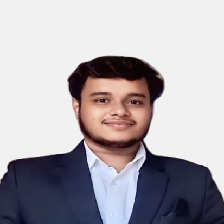

In [19]:
test_image_2

In [20]:
test_data_3 = image.img_to_array(test_image_2).reshape(1,224,224,3)

In [21]:
pred_1 = model.predict(test_data_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [22]:
np.argmax(pred_1)

834

In [23]:
decode_predictions(pred_1,top=2)

[[('n04350905', 'suit', 0.6384253), ('n04591157', 'Windsor_tie', 0.15380856)]]

In [24]:
pred_2 = model2.predict(test_data_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [25]:
np.argmax(pred_2)

834

In [26]:
decode_predictions(pred_2,top=2)

[[('n04350905', 'suit', 0.908796), ('n04591157', 'Windsor_tie', 0.03513094)]]

### Comparison 2

In [27]:
import cv2

In [28]:
test_image_3 = cv2.imread('/content/Shuvendu Pritam Das.jpg')

In [29]:
test_image_3.shape

(531, 413, 3)

In [30]:
test_image_3 = cv2.resize(test_image_3,(224,224))

In [31]:
test_image_3.shape

(224, 224, 3)

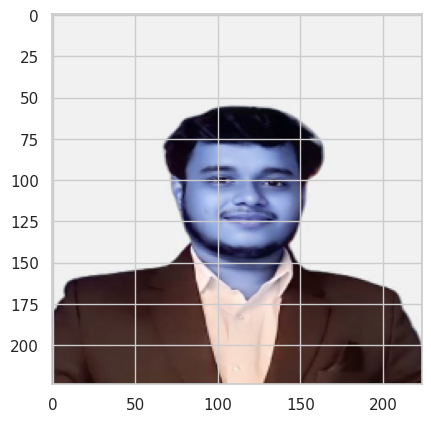

In [32]:
plt.imshow(test_image_3)

In [33]:
test_image_4 = test_image_3[50:140,50:175,:]

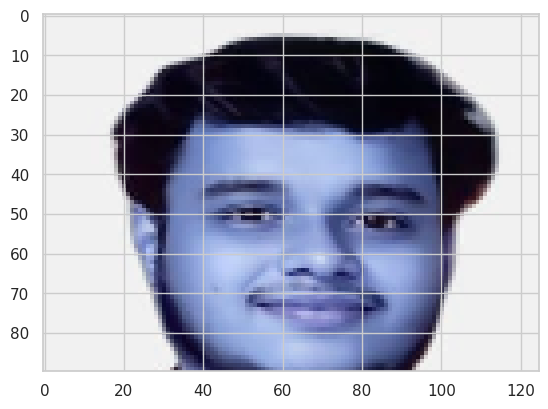

In [34]:
plt.imshow(test_image_4)

In [35]:
test_image_4.shape

(90, 125, 3)

In [36]:
test_image_4 = cv2.resize(test_image_4,(224,224))

In [37]:
test_image_4.shape

(224, 224, 3)

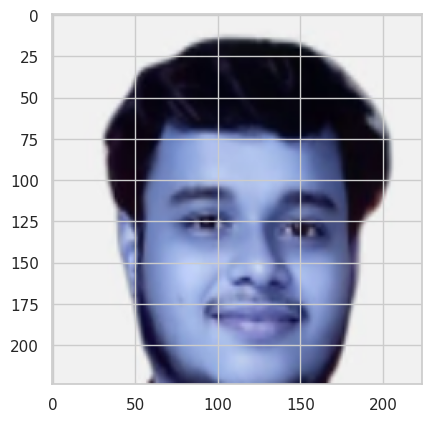

In [38]:
plt.imshow(test_image_4)

In [39]:
test_data_4 = test_image_4.reshape(1,224,224,3)

In [40]:
pred_3 = model.predict(test_data_4)
pred_4 = model2.predict(test_data_4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 902ms/step


In [41]:
decode_predictions(pred_3,top=2)

[[('n02669723', 'academic_gown', 0.40857664),
  ('n04350905', 'suit', 0.09457418)]]

In [42]:
decode_predictions(pred_4,top=2)

[[('n02669723', 'academic_gown', 0.40275896),
  ('n03787032', 'mortarboard', 0.16129689)]]

### Comparison-3

In [43]:
image_uploaded = image.load_img('/content/Screenshot 2024-10-16 220458.png', target_size = (224, 224))

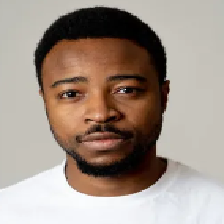

In [44]:
image_uploaded

In [45]:
image_uploaded = image.img_to_array(image_uploaded).reshape(1,224,224,3)

In [46]:
pred_34 = model.predict(image_uploaded)
pred_35 = model2.predict(image_uploaded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [47]:
decode_predictions(pred_34,top=2)

[[('n03724870', 'mask', 0.304993), ('n02883205', 'bow_tie', 0.2976805)]]

In [48]:
decode_predictions(pred_35,top=2)

[[('n03724870', 'mask', 0.49366102), ('n03595614', 'jersey', 0.10987694)]]